### Recreate the following figures (with slight modification for some)
 - [X] Distribution for the number of peaks (without HiChIP-Peaks)
 - [ ] Distribution for the number of loops at ALL resolutions and settings  (use matplotlib gridspec to group together by setting)
    - [ ] HiCCUPs
    - [ ] FitHiChIP with peaks from ChIP-seq (Stringent)
    - [ ] FitHiChIP with peaks from ChIP-seq (Loose)
    - [ ] FitHiChIP with peaks from HiChIP (Stringent)
    - [ ] FitHiChIP with peaks from HiChIP (Loose)
 - [ ] Recall plot for just FitHiChIP utility versus ChIP-seq
 - [ ] Threshold scatterplot

### New plots: correlation between the peak p-value and the loop p-value, do this for:
 - [ ] ChIP-seq peaks and the corresponding FithiChIP loops
 - [ ] HiChIP peaks and the corresponding FithiChIP loops
 - [ ] DB comparison table

In [1]:
import os
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tracker
import numpy as np
latest_date = tracker.figure_dates[-1]
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling/')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

## Numerical Values

#### Cell Lines

In [36]:
human = "results/samplesheets/post-hicpro/2023.04.04.13.38.post-hicpro.samplesheet.with_header.tsv"
mouse = "results/samplesheets/post-hicpro/2023.04.04.13.39.post-hicpro.samplesheet.with_header.tsv"

In [37]:
human_df = pd.read_table(human, skiprows=0)
mouse_df = pd.read_table(mouse, skiprows=0)

In [42]:
human_cellosaurus_id = set(human_df["cellosaurus_id"].to_list())
human_cellosaurus_id_f = [s for s in human_cellosaurus_id if "CV" in str(s)]
mouse_cellosaurus_id = set(mouse_df["cellosaurus_id"].to_list())
mouse_cellosaurus_id_f = [s for s in mouse_cellosaurus_id if "CV" in str(s)]

In [47]:
len(human_cellosaurus_id_f) + len(mouse_cellosaurus_id_f)

82

#### Protein Pulldown

In [53]:
human_df_pulldown_unique = set(human_df["antibody_target"].to_list())

In [55]:
human_df_pulldown_unique

{'CTCF',
 'H3K27ac',
 'H3K27me3',
 'H3K4me1',
 'H3K4me3',
 'H3K4me4',
 'KLF4',
 'NANOG',
 'OCT4',
 'PR',
 'RNA-Pol-II',
 'Rad21',
 'SMC1',
 'SMC1A',
 'V5',
 'YY1'}

In [69]:
human_df_pulldown = human_df["antibody_target"].to_list()
human_df_pulldown_h3k27ac = [p for p in human_df_pulldown if p == "H3K27ac"]
len(human_df_pulldown_h3k27ac)

330

In [70]:
len(human_df_pulldown_h3k27ac)/len(human_df) * 100

67.90123456790124

In [60]:
mouse_df_pulldown_unique = set(mouse_df["antibody_target"].to_list())

In [61]:
mouse_df_pulldown_unique

{'BATF',
 'CTCF',
 'FGFR1',
 'FoxP3',
 'GR',
 'Gata1',
 'H3K27ac',
 'H3K27me3',
 'H3K4me3',
 'H3K9me3',
 'IgG',
 'KLF4',
 'Lbd1',
 'Oct4',
 'Pax3',
 'RYBP',
 'SMC1A',
 'YY1'}

In [63]:
mouse_df_pulldown = mouse_df["antibody_target"].to_list()
mouse_df_pulldown_h3k27ac = [p for p in mouse_df_pulldown if p == "H3K27ac"]
len(mouse_df_pulldown_h3k27ac)

84

In [71]:
len(mouse_df_pulldown_h3k27ac) / len(mouse_df) * 100

43.29896907216495

In [72]:
146+30

176

In [48]:
human_df

std_sample_name  \
0                                293T.GSE128106.Homo_Sapiens.HindIII.b1   
1                            293T-PDS.GSE128106.Homo_Sapiens.HindIII.b1   
2                         293T-TMPYP4.GSE128106.Homo_Sapiens.HindIII.b1   
3                             A673_SA1m1.GSE133227.Homo_Sapiens.MboI.b1   
4                             A673_SA1m1.GSE133227.Homo_Sapiens.MboI.b2   
5                             A673_SA2m1.GSE133227.Homo_Sapiens.MboI.b1   
6                             A673_SA2m1.GSE133227.Homo_Sapiens.MboI.b2   
7                             A673_SA2m1.GSE133227.Homo_Sapiens.MboI.b3   
8                             A673_SA2m1.GSE133227.Homo_Sapiens.MboI.b4   
9                             A673_SA2m1.GSE133227.Homo_Sapiens.MboI.b5   
10                            A673_SA2m1.GSE133227.Homo_Sapiens.MboI.b1   
11                            A673_SA2m1.GSE133227.Homo_Sapiens.MboI.b2   
12                            A673_SA2m1.GSE133227.Homo_Sapiens.MboI.b3   
13                             A673_SA2r.GSE133227.Homo_Sapiens.MboI.b1   
14                             A673_SA2r.GSE133227.Homo_Sapiens.MboI.b2   
15                             A673_SA2r.GSE133227.Homo_Sapiens.MboI.b3   
16                             A673_SA2r.GSE133227.Homo_Sapiens.MboI.b1   
17                             A673_SA2r.GSE133227.Homo_Sapiens.MboI.b2   
18                             A673_SA2r.GSE133227.Homo_Sapiens.MboI.b3   
19                             A673_SA2r.GSE133227.Homo_Sapiens.MboI.b4   
20                             A673_SA2r.GSE133227.Homo_Sapiens.MboI.b5   
21                               A673_WT.GSE133227.Homo_Sapiens.MboI.b1   
22                               A673_WT.GSE133227.Homo_Sapiens.MboI.b2   
23                               A673_WT.GSE133227.Homo_Sapiens.MboI.b3   
24                               A673_WT.GSE133227.Homo_Sapiens.MboI.b4   
25                               A673_WT.GSE133227.Homo_Sapiens.MboI.b5   
26                               A673_WT.GSE133227.Homo_Sapiens.MboI.b1   
27                               A673_WT.GSE133227.Homo_Sapiens.MboI.b2   
28                               A673_WT.GSE133227.Homo_Sapiens.MboI.b3   
29                               A673_WT.GSE133227.Homo_Sapiens.MboI.b4   
30           A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.MboI.b1   
31           A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.MboI.b2   
32          A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.MboI.b1   
33          A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.MboI.b2   
34          A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.MboI.b1   
35          A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.MboI.b2   
36                            Aortic-VIC.GSE154513.Homo_Sapiens.MboI.b1   
37                                 AoSMC.GSE178598.Homo_Sapiens.MboI.b1   
38                                ARK-1.GSE137936.Homo_Sapiens.DpnII.b1   
39                                   BC1.GSE136090.Homo_Sapiens.MboI.b1   
40                                   BC3.GSE136090.Homo_Sapiens.MboI.b1   
41                                 BCBL1.GSE136090.Homo_Sapiens.MboI.b1   
42                        CAR-T-CD19-D10.GSE168881.Homo_Sapiens.MboI.b1   
43                        CAR-T-CD19-D10.GSE168881.Homo_Sapiens.MboI.b2   
44                          CAR-T-HA-D10.GSE168881.Homo_Sapiens.MboI.b1   
45                          CAR-T-HA-D10.GSE168881.Homo_Sapiens.MboI.b2   
46                               Caudate.GSE147672.Homo_Sapiens.MboI.b1   
47                               Caudate.GSE147672.Homo_Sapiens.MboI.b2   
48          cbCD34+-HSPC-SJALL068279-D1.GSE165207.Homo_Sapiens.Arima.b1   
49          cbCD34+-HSPC-SJAUL068292-D1.GSE165207.Homo_Sapiens.Arima.b1   
50         cbCD34+-HSPC-SJMPAL011911-D1.GSE165207.Homo_Sapiens.Arima.b1   
51         cbCD34+-HSPC-SJMPAL011914-D1.GSE165207.Homo_Sapiens.Arima.b1   
52         cbCD34+-HSPC-SJTALL005006-D2.GSE165207.Homo_Sapiens.Arima.b1   
53    

In [2]:
latest_date='2022.08.23.17.20'

In [1]:
# setting input and output with jupyter notebook in context 
if 'ipykernel_launcher.py' in sys.argv[0]:
    input_fn = 'results/samplesheets/post-hicpro/{}.post-hicpro.google-samplesheet.tsv'.format(latest_date)
    output_prefix = 'results/samplesheets/post-hicpro/figure.samplesheet'
else:
    input_fn = sys.argv[1]
    output_prefix = sys.argv[2]

NameError: name 'sys' is not defined

In [22]:
input_fn="init.celltype.undergoing_curation.xlsx"

In [23]:
# loading the samplesheet
df = pd.read_excel(input_fn, skiprows=0)

In [24]:
df

celltype_id  \
0    f6031321-fb97-4630-8501-6ffc6ed2fbe6   
1    ac74dfc0-e744-47f3-8e8d-e9a58c2e42b0   
2    5c2475a5-e68c-4e04-be30-1bd3e2b8dc77   
3    0e7418fa-e066-47f3-adbb-74a0e9111801   
4    4f2e7726-af63-4700-8907-aca04c25a8c6   
5    3de335b1-f728-47a4-af3b-1c979e55ab77   
6    490377cf-236a-4f4f-aa9c-5f05885acf1a   
7    44c9e370-fe69-464a-bd14-9e1806721c40   
8    e62c02a6-5d81-4c77-bd1d-867126972e2c   
9    c57c43f7-b385-4fc4-8095-5b5d0914dbf2   
10   718bd441-44f5-4084-aa7d-fc23bb575808   
11   0315f113-39b8-4c48-a039-1d5d08b611eb   
12   db48e578-e92e-4547-ae99-201ccf0c252c   
13   668a0dd8-f050-4502-89d8-399730656686   
14   dd81f403-8632-43dd-9d94-6cc5b3721f27   
15   88c5e681-4121-40c2-895d-bdbb545faa5b   
16   5be95274-3a95-464d-abd1-02de9daa71a1   
17   49f0506a-e560-4722-95f6-d693cbe5f03e   
18   736cc3a3-eaa8-4abe-88bc-3f2ea69ac25f   
19   0aabac16-8198-455a-8b1b-07884beb8687   
20   a83ea994-b2d3-4c1d-ae05-89e1293d3ef3   
21   e13dca07-d1e6-48d0-8374-2f9a2a13aeae   
22   7f26528b-ea10-4f06-9482-26710ed6d0f4   
23   76731738-c732-4f4d-8dbf-29116d78bc01   
24   97bb257c-19f3-439a-80b1-db351eba5c5e   
25   01f0161d-17d7-47dd-a5b8-3e815f44e5e3   
26   eaef9680-3a6f-487c-98d8-2d1b62e23017   
27   d6da1623-ffef-48f3-bbdd-97536d42a4da   
28   bc8dee40-1e89-4f6c-98e1-dee1993d4f98   
29   3bede818-0c03-4bb1-b11b-3c45ec323027   
30   73da7527-9d28-44a5-b162-d42026f09070   
31   08983233-ce82-4374-ae59-c1657778a258   
32   07a18cfc-93b4-420e-bb6b-4dab9a6fafae   
33   5a66e68d-4619-45c5-b8f3-692ec3defbac   
34   4bbef7d1-8eb5-44d3-8740-bcce08454140   
35   1a8bfd4b-3d83-485c-acba-58057c0b20ff   
36   9360b49a-96f7-4d43-bc9a-ac6937dccfe6   
37   9f0ab0d8-b9e0-402c-99ea-3cf7176ebebf   
38   69199084-c060-41ba-8dd9-ee4f51cf059b   
39   f55bde42-b215-40cc-bdda-be504e8f04f1   
40   d71785d4-2c6b-46d6-85e3-c48e991bbebf   
41   edadb504-f85e-4964-9874-03048b1f5784   
42   4ac245ab-59e8-4d46-8dfd-d0ff0c279a42   
43   f3e64421-c1d0-4122-b85e-e7b7dbdb249f   
44   1a6f67a5-420b-4591-bb49-fea5f3ab0ab4   
45   1faf848a-1605-44a7-945e-cab72d783dd3   
46   8b4abc94-d63c-4e96-a300-a442855c5658   
47   ef9f6d95-dd4e-40d9-9939-87f94016a689   
48   34c5c394-01ba-4bc9-9f18-5cf228c793a4   
49   42499d8e-0975-4d67-ab48-280e4c9ab6a0   
50   3f96f9e1-c293-4db1-9bc3-861c729cf643   
51   2a438f8f-48eb-4a8a-bb74-4fafd3a928f7   
52   1340a724-f2ec-481f-aefa-c7f6fb67e499   
53   735bdcc6-a156-4f2a-ab1a-eed329052abd   
54   c7ab6cf8-c050-4a90-838f-8873f5954e4a   
55   ceafecc8-282c-4b08-83d6-4fca91d187fe   
56   97d950f5-13c5-4867-8d55-a185a9492231   
57   78ae20c9-d06c-4c75-a0d3-0afc790132bc   
58   e23138e7-aed4-432e-a21c-761b7d3f457c   
59   ecf8f9b8-63ee-4dc6-b5fd-c1d4a8b480e2   
60   3047242d-819d-4e56-825f-2e83a1e575e1   
61   3d08a9ce-e53a-4acb-9166-3c1eb2810a50   
62   6a44cebb-a9fc-4d6e-a597-a63a1fea601c   
63   69636e13-217a-4cb3-8d5e-41a39ed6e426   
64   8b6cb6c4-91a9-451f-b5f1-7036c0447b84   
65   9eb2d50f-cbd4-42e9-a46a-4061090f9e50   
66   5124902e-66a3-4631-be22-1b88b6c956a2   
67   64f09679-3472-4d21-adc1-7132118626ba   
68   478b4392-b45b-447c-9c15-f25e4fb73d34   
69   044c9be5-d996-44cf-b067-d414a7056516   
70   4e9a19ff-8879-4c7d-8a21-16e3ce8f1b76   
71   c19f9190-f3f9-4f7f-8ae8-4b080ed6b11a   
72   bdb2df99-eb3c-47bd-88ab-66fd0a233fe3   
73   54c090a4-9c85-48e0-a605-188f51be34ec   
74   b5f7e1af-0a36-4a2e-bde5-ee30754970d4   
75   f4aa83a9-1604-431b-a26c-dd60c956044c   
76   aba4456e-53c6-4524-9afe-931bf1dd40b0   
77   8b4b3767-2287-4829-a01c-e205f8a33a75   
78   5d392327-9044-4251-907e-0d19fc7b660f   
79   5a4f77b4-9f85-4b7e-86f0-ee393df01223   
80   2bb9fdf6-fa87-45a1-937e-868f1b16a089   
81   ff8e9ee1-2648-46fb-a9e0-63ceb28e6363   
82   8f8af3f3-be02-43ed-b319-3ca35cf66f7a   
83   7c3bf7fa-0e85-4959-aca5-6b24dedf7d84   
84   7bd18871-f2be-4708-9122-a4437cf8e45a   
85   357f5e26-c62d-4493-8468-fce0196ad6de   
86   0b948e18-f8f2-4d95-bba3-15c93d6483ac   
87   c9c8ef40-b2ee-451c-8de1-e2ce138df6e8   
88   64ed7729-579d-455b-b

In [25]:
major_cols = ['sample_name',
 'organism',
 'curated_biomaterial',
 'curated_organ',
 'curated_celltype']
ready_df = df[major_cols]

In [26]:
ready_df

sample_name  \
0                                       293T.GSE128106.Homo_Sapiens.YY1.b1.t1   
1                                       293T.GSE128106.Homo_Sapiens.YY1.b1.t2   
2                                       293T.GSE128106.Homo_Sapiens.YY1.b1.t3   
3                                       293T.GSE128106.Homo_Sapiens.YY1.b1.t4   
4                                   293T-PDS.GSE128106.Homo_Sapiens.YY1.b1.t1   
5                                   293T-PDS.GSE128106.Homo_Sapiens.YY1.b1.t2   
6                                293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1.t1   
7                                293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1.t2   
8                                A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1.t1   
9                                A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2.t1   
10                               A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1.t1   
11                               A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2.t1   
12                               A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3.t1   
13                               A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4.t1   
14                               A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5.t1   
15                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b1.t1   
16                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b2.t1   
17                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b3.t1   
18                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1.t1   
19                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b2.t1   
20                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b3.t1   
21                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b1.t1   
22                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b2.t1   
23                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b3.t1   
24                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b4.t1   
25                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b5.t1   
26                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b1.t1   
27                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b2.t1   
28                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b3.t1   
29                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b4.t1   
30                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b5.t1   
31                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b1.t1   
32                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b2.t1   
33                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b3.t1   
34                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b4.t1   
35              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t1   
36              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t2   
37              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2.t1   
38              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t3   
39              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t4   
40              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2.t2   
41             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t1   
42             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t2   
43             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2.t1   
44             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t3   
45             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t4   
46             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2.t2   
47             A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1.t1   
48             A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2.t1   
49             A

In [27]:
# getting the sample names
sample_names = []
for i, sr in ready_df.iterrows():
    sample_name = '{sample_name}.{gse_id}.{organism}.{antibody_target}.b{biological_rep}'
    sample_name = sr[0][:-3]
    sample_names.append(sample_name)
ready_df.loc[:, 'sample_name'] = sample_names

/tmp/ipykernel_61438/4076473242.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ready_df.loc[:, 'sample_name'] = sample_names


In [28]:
final_df = ready_df.drop_duplicates().reset_index(drop=True)

In [32]:
final_df = final_df.loc[final_df["curated_organ"] != "Undetermined"].reset_index(drop=True)

In [33]:
final_df

sample_name  \
0                                       293T.GSE128106.Homo_Sapiens.YY1.b1   
1                                   293T-PDS.GSE128106.Homo_Sapiens.YY1.b1   
2                                293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1   
3                                A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1   
4                                A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2   
5                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1   
6                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2   
7                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3   
8                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4   
9                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5   
10                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b1   
11                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b2   
12                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b3   
13                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1   
14                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b2   
15                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b3   
16                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b1   
17                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b2   
18                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b3   
19                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b4   
20                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b5   
21                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b1   
22                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b2   
23                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b3   
24                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b4   
25                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b5   
26                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b1   
27                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b2   
28                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b3   
29                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b4   
30              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1   
31              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2   
32             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1   
33             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2   
34             A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1   
35             A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2   
36                            Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1   
37                                 AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1   
38                                 ARK-1.GSE137936.Homo_Sapiens.H3K27ac.b1   
39                                   BC1.GSE136090.Homo_Sapiens.H3K27ac.b1   
40                                   BC3.GSE136090.Homo_Sapiens.H3K27ac.b1   
41                                 BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1   
42           cbCD34+-HSPC-SJALL068279-D1.GSE165207.Homo_Sapiens.H3K27ac.b1   
43           cbCD34+-HSPC-SJAUL068292-D1.GSE165207.Homo_Sapiens.H3K27ac.b1   
44          cbCD34+-HSPC-SJMPAL011911-D1.GSE165207.Homo_Sapiens.H3K27ac.b1   
45          cbCD34+-HSPC-SJMPAL011914-D1.GSE165207.Homo_Sapiens.H3K27ac.b1   
46          cbCD34+-HSPC-SJTALL005006-D2.GSE165207.Homo_Sapiens.H3K27ac.b1   
47                      CD34+-Cord-Blood.GSE165207.Homo_Sapiens.H3K27ac.b1   
48                               CORL279.GSE151001.Homo_Sapiens.H3K27ac.b1   
49                                CORL88.GSE151001.Homo_Sapiens.H3K27ac.b1   
50                                   CTL.GSE117888.Homo_Sapiens.H3K27ac.b1   
51     

In [34]:
organs = []
for i, sr in final_df.iterrows():
    if "," in sr[3]:
        organ = "Multiple Organs"
    else:
        organ = sr[3]
    organs.append(organ)
final_df.loc[:, 'curated_organ'] = organs

In [41]:
mouse_df = final_df.loc[final_df["organism"] == "Mus musculus"].sort_values(by="sample_name").reset_index(drop=True)
human_df = final_df.loc[final_df["organism"] == "Homo sapiens"].sort_values(by="sample_name").reset_index(drop=True)

In [42]:
len(mouse_df)

134

In [43]:
len(human_df)

253

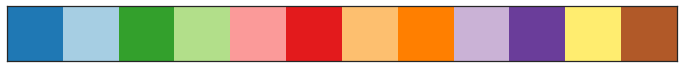

In [63]:
sns.palplot(palette)

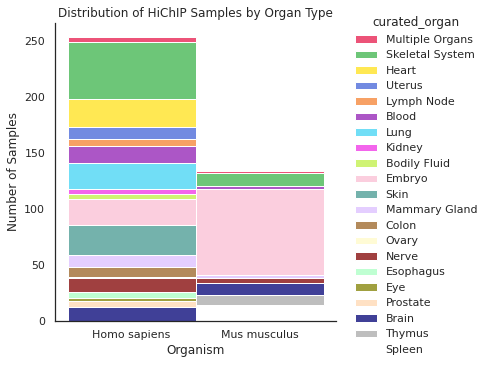

In [64]:
sns.set(rc = {'figure.figsize':(5,10)})
sns.set_theme(style="white")
palette = [
'#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff']
sns.set_palette(palette)
ax = sns.displot(x="organism", hue="curated_organ", data=final_df, multiple="stack")
ax.set(xlabel='Organism', ylabel='Number of Samples', title='Distribution of HiChIP Samples by Organ Type')
#ax.savefig('dist-cell-type.png', dpi=300)

In [120]:
organs = {}
for i, sr in mouse_df.iterrows():
    if sr[3] not in organs:
        organs[sr[3]] = 1
    else:
        organs[sr[3]] = organs[sr[3]] + 1
organs   

{'Mammary Gland': 3,
 'Nerve': 4,
 'Thymus': 9,
 'Skeletal System': 12,
 'Multiple Organs': 2,
 'Embryo': 77,
 'Brain': 11,
 'Blood': 2,
 'Spleen': 14}

In [121]:
mouse_organs = pd.DataFrame.from_dict(dict(sorted(organs.items(), key=lambda item: item[1])), orient="index", columns=["Count"])
mouse_organs["organ"] = mouse_organs.index

In [122]:
mouse_organs

Count            organ
Multiple Organs      2  Multiple Organs
Blood                2            Blood
Mammary Gland        3    Mammary Gland
Nerve                4            Nerve
Thymus               9           Thymus
Brain               11            Brain
Skeletal System     12  Skeletal System
Spleen              14           Spleen
Embryo              77           Embryo

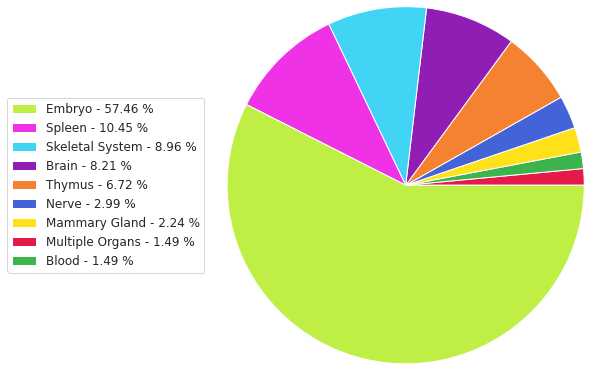

In [124]:
data = np.array(mouse_organs["Count"])
cate = np.array(mouse_organs["organ"])
percent = 100.*data/data.sum()
patches, texts = plt.pie(data, radius=1.6)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(cate, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, data),
                                          key=lambda cate: cate[2],
                                          reverse=True))
plt.legend(patches, labels, loc='center right', bbox_to_anchor=(-0.2, 0.5), fontsize=12)
plt.savefig('mouse_organs.png', bbox_inches='tight', dpi=1000)

In [163]:
def label_protein(row):
    if row['a'] == 'YY1':
          return 'Transcription Factor'
    if row['a'] == 'CTCF':
          return 'Structural Maintenance Protein'
    if row['a'] == 'H3K27ac':
          return 'Histone Modification'
    if row['a'] == 'SMC1A':
          return 'Structural Maintenance Protein'
    if row['a'] == 'Rad21':
          return 'Structural Maintenance Protein'
    if row['a'] == 'OCT4':
          return 'Transcription Factor'
    if row['a'] == 'NANOG':
          return 'Transcription Factor'
    if row['a'] == 'KLF4':
          return 'Transcription Factor'
    if row['a'] == 'H3K4me1':
          return 'Histone Modification'
    if row['a'] == 'RNA-Pol-II':
          return 'Transcription Factor'
    if row['a'] == 'V5':
          return 'Transcription Factor'
    if row['a'] == 'H3K27me3':
          return 'Histone Modification'
    if row['a'] == 'PR':
          return 'Transcription Factor'
    if row['a'] == 'H3K4me3':
          return 'Histone Modification'
    if row['a'] == 'H3K4me4':
          return 'Histone Modification'
    return 'Other'

In [165]:
final_df = final_df.replace("SMC1", value="SMC1A")
final_df['Protein Type'] = final_df.apply(lambda row: label_protein(row), axis=1)
final_df

sn  \
0                                       293T.GSE128106.Homo_Sapiens.YY1.b1   
1                                   293T-PDS.GSE128106.Homo_Sapiens.YY1.b1   
2                                293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1   
3                                A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1   
4                                A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b2   
5                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b1   
6                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b2   
7                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b3   
8                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b4   
9                                A673_SA2m1.GSE133227.Homo_Sapiens.CTCF.b5   
10                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b1   
11                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b2   
12                            A673_SA2m1.GSE133227.Homo_Sapiens.H3K27ac.b3   
13                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b1   
14                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b2   
15                                A673_SA2r.GSE133227.Homo_Sapiens.CTCF.b3   
16                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b1   
17                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b2   
18                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b3   
19                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b4   
20                             A673_SA2r.GSE133227.Homo_Sapiens.H3K27ac.b5   
21                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b1   
22                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b2   
23                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b3   
24                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b4   
25                                  A673_WT.GSE133227.Homo_Sapiens.CTCF.b5   
26                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b1   
27                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b2   
28                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b3   
29                               A673_WT.GSE133227.Homo_Sapiens.H3K27ac.b4   
30              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1   
31              A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2   
32             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1   
33             A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2   
34             A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1   
35             A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2   
36                            Aortic-VIC.GSE154513.Homo_Sapiens.H3K27ac.b1   
37                                 AoSMC.GSE178598.Homo_Sapiens.H3K27ac.b1   
38                                 ARK-1.GSE137936.Homo_Sapiens.H3K27ac.b1   
39                                   BC1.GSE136090.Homo_Sapiens.H3K27ac.b1   
40                                   BC3.GSE136090.Homo_Sapiens.H3K27ac.b1   
41                                 BCBL1.GSE136090.Homo_Sapiens.H3K27ac.b1   
42                        CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b1   
43                        CAR-T-CD19-D10.GSE168881.Homo_Sapiens.H3K27ac.b2   
44                          CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.b1   
45                          CAR-T-HA-D10.GSE168881.Homo_Sapiens.H3K27ac.b2   
46           cbCD34+-HSPC-SJALL068279-D1.GSE165207.Homo_Sapiens.H3K27ac.b1   
47           cbCD34+-HSPC-SJAUL068292-D1.GSE165207.Homo_Sapiens.H3K27ac.b1   
48          cbCD34+-HSPC-SJMPAL011911-D1.GSE165207.Homo_Sapiens.H3K27ac.b1   
49          cbCD34+-HSPC-SJMPAL011914-D1.GSE165207.Homo_Sapiens.H3K27ac.b1   
50          cbCD34+-HSPC-SJTALL005006-D2.GSE165207.Homo_Sapiens.H3K27ac.b1   
51              

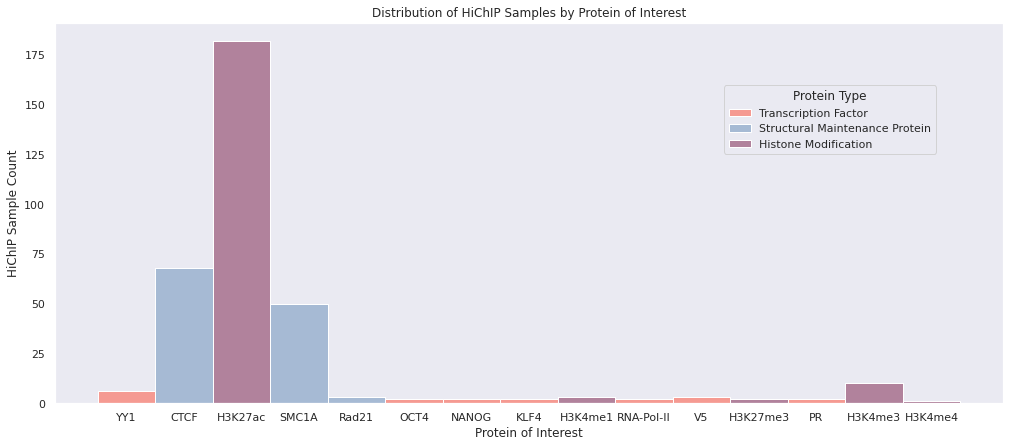

In [184]:
sns.set(rc = {'figure.figsize':(17,7)})
sns.set_theme(style="dark")
palette = [
'#fa8072',
'#90AACB',
'#9F5F80']
sns.set_palette(palette)
ax = sns.histplot(x="a", data=final_df, multiple="stack", hue="Protein Type")
sns.move_legend(ax, "upper left", bbox_to_anchor=(.70, .85))
ax.set(xlabel='Protein of Interest', ylabel='HiChIP Sample Count', title='Distribution of HiChIP Samples by Protein of Interest')
fig = ax.get_figure()
fig.savefig('dist-chip-pulldown.png', dpi=300) 